# Hausaufgabe 3 &ndash; Normal Edition
## "Malen nach Zahlen"
<!-- Lizensiert unter (CC BY 4.0) Gert Herold -->

Um das Strömungsfeld um einen kreisförmigen Zylinder mit einem Durchmesser von 7,5 mm besser zu verstehen, wurden [CFD-Simulationen](https://de.wikipedia.org/wiki/Numerische_Str%C3%B6mungsmechanik) durchgeführt. 
Die Berechnungen wurden auf einem unregelmäßigen 2D-Gitter durchgeführt, das den Zylinder durchschneidet, so dass er darin als Kreis erscheint. 
Die Ergebnisse für einen diskreten Zeitpunkt wurden als [CSV-Datei](https://de.wikipedia.org/wiki/CSV_(Dateiformat)) exportiert.

**Die gesamte Programmierung für diese Aufgabe kann ohne if-Anweisungen oder Schleifen durchgeführt werden! Es ist okay, wenn Sie diese zunächst für eine erste Lösung benötigen, aber versuchen Sie, eine Variante zu finden, die diese Strukturen nicht benötigt und stattdessen die Funktionalitäten von Numpy nutzt.**

Zunächst werden einige Imports durchgeführt, die sich möglicherweise im weiteren Verlauf noch als hilfreich erweisen:

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

### 1) Gitterparameter

**1.1) Laden Sie die Daten aus der Datei `U_xyplane.csv`.**

  * Entpacken Sie den Inhalt der Spalten in neue Variablen (1D-Arrays) `u, v, w, x, y, z`.
  * Für wie viele Punkte liegen Daten vor? Speichern Sie die Anzahl in der Variable `n_points`.

_Hinweise: Die Zeilen eines Arrays `A` mit 2 Zeilen lassen sich z.B. so "entpacken": `a,b = A`. Alle Werte sind in SI-Einheiten gegeben (m und m/s). Geschwindigkeitskomponenten (hier `u,v,w`) werden in der Datei mit "U" bezeichnet, Koordinaten (hier `x,y,z`) mit "Points"._

In [11]:
# Hier eigenen Code schreiben ...
import pandas as pd
u_loaded = pd.read_csv('U_xyplane.csv', sep=',', header=None)
u, v, w, x, y, z = u_loaded.values.transpose()[:,1:].astype(float)  # each column is turned into a row and then assigned to a variable u,v,...
                                                      # [:,1:] skips the name of the row, and we convert string values to floats

n_points = len(u)
print(u)

[36.7028 36.7027 36.7032 ... 44.96   44.5054 43.733 ]


In [12]:
# Hier sind einige Plausibilitätstests:
assert 44444>n_points>33333
assert v.shape == x.shape == z.shape

Um eine grobe Vorstellung vom Setup zu bekommen, wäre es schön, einen schnellen Überblick über den Simulationsbereich einschließlich des "Zylinderkreises" zu haben.

**1.2) Bestimmen Sie die minimalen und maximalen x- und y-Werte und zeichnen Sie ein Rechteck, das die betrachtete Fläche abdeckt und einen Kreis mit (x, y) = (0.06 m, 0.15 m) und einem Durchmesser von 7.5 mm umgibt.**

  * Speichern Sie die minimalen/maximalen Werte in den Variablen `xmin`, `xmax`, `ymin` und `ymax`.
  * Schreiben Sie eine Funktion, die die x- und y-Ausdehnung übergeben wird und die mit dem Befehl [_plot()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) eine  Rechteckumrandung zeichnet.

Einen Kreis in eine bestehende Abbildung einzufügen ist z.B. so möglich:
```python
    plt.gca().add_patch(Circle((x_center, y_center), radius, color='k'))
```

In [74]:
# Funktion, die die x- und y-Ausdehnung übergeben wird und die mit dem Befehl plot() eine Rechteckumrandung zeichnet.
from matplotlib.patches import Rectangle

def rUmrandung(xmin, xmax, ymin, ymax):
    x_vals = [xmin, xmax, xmax, xmin, xmin]
    y_vals = [ymin, ymin, ymax, ymax, ymin]
    return plt.plot(x_vals,y_vals, 'r')
    

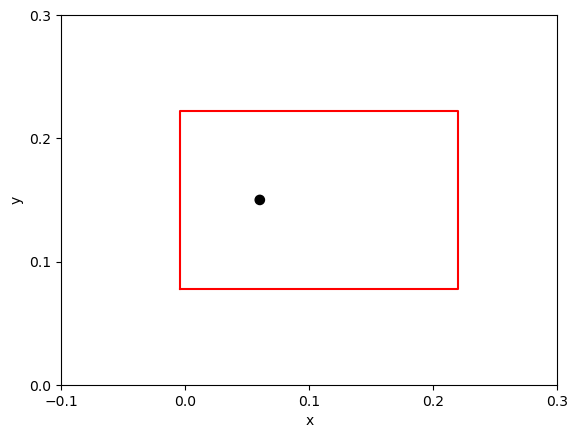

In [76]:
# Hier eigenen Code schreiben ...
xmin = min(x)
xmax = max(x)
ymin = min(y)
ymax = max(y)

x_center = 0.06  # m 
y_center = 0.15  # m
radius = (7.5/2)/1000 #mm to m

# Get the current reference
ax = plt.gca()
plt.xlim([-0.1,0.3])
plt.ylim([0.0,0.3])
plt.xticks(np.linspace(-0.1,0.3,5)) # gröbere achsenabschnitte
plt.yticks(np.linspace(0.0,0.3,4))
plt.xlabel("x")
plt.ylabel("y")

# Rectangle 
rUmrandung(xmin, xmax, ymin, ymax)

# Add the patches to the Axes
ax.add_patch(Circle((x_center, y_center), radius, color='k')) 
plt.show()

In [77]:
# Hier sind einige Plausibilitätstests:
assert xmax-xmin == 0.224
assert (ymax-ymin)*1.5 < (xmax-xmin)

Vor der Auswertung der eigentlichen Daten soll zunächst die Gitterstruktur genauer untersucht werden.

**1.3) Visualisieren Sie das Gitter.**

  * Zeichnen Sie alle Gitterpunkte in einem 20x13-Zoll-Plot unter Verwendung von `'.'`-Markern (kleine Punkte) mit einer Größe von 0.5.
  * Bestimmen Sie den Teilbereich des Gitters, der nur Punkte mit $5.9\,$cm $< x < 6.1\,$cm and $y > 15\,$cm enthält. 
  * Wie viele Punkte liegen in diesem Bereich? Speichern Sie die Anzahl in einer Variable `n_innen`.
  * Zeichnen Sie die entsprechenden Gitterpunkte mit einer anderen Farbe in die ursprüngliche Abbildung ein.

_Hinweis: Um mehrere boolesche Ausdrücke in Arrays zu kombinieren, können die [bitweisen Operatoren](https://wiki.python.org/moin/BitwiseOperators) `&` (und) sowie `|` (oder) verwendet werden._

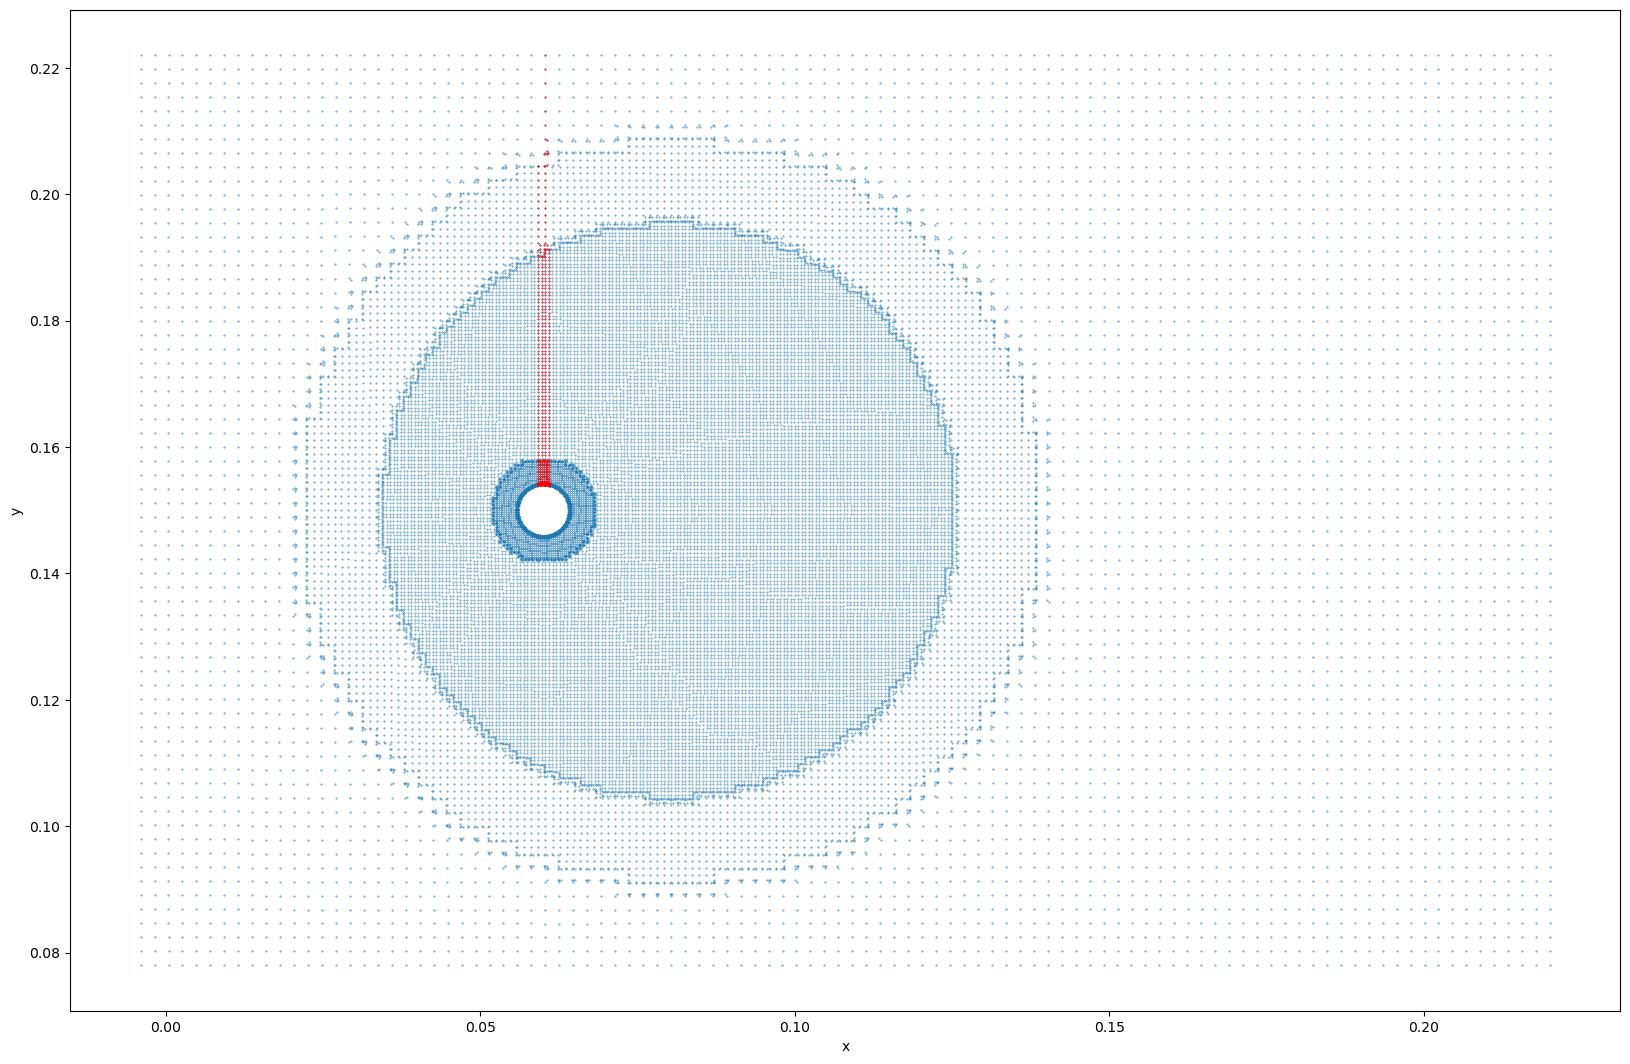

n_innen: 516


In [78]:
# Hier eigenen Code schreiben ...
#x_new = [i for i,j in zip(x,y) if i > 0.059 and i < 0.061 and j > 0.15] # only x values within [5.9 cm, 6.1cm]
#y_new = [j for i,j in zip(x,y) if i > 0.059 and i < 0.061 and j > 0.15] # only y values above 15cm
condition = np.logical_and(np.logical_and(x > 0.059, x < 0.061), y > 0.15) # only x values within [5.9 cm, 6.1cm] and only y values above 15cm
x_new = x[condition]
y_new = y[condition]

plt.figure(figsize=(20,13)) 
plt.scatter(x, y, marker='.', s=0.5) # original data
plt.scatter(x_new, y_new, marker='.', color="r", s=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

n_innen = len(x_new) # same size as y_new
print("n_innen: %d" %(n_innen))

In [79]:
# Hier ist ein Plausibilitätstest:
assert 500<n_innen<1000

**1.4) Berechnen Sie für jeden Punkt im kleineren Teilgitter den Abstand zum nächstliegenden Nachbarpunkt.**

Das ist z.B. möglich, indem die Abstände von allen Punkten zu allen anderen Punkten bestimmt werden und dann für jeden Punkt der jeweils kleinste Abstand (größer 0!) herausgesucht wird.

  * Sortieren Sie die jeweils ermittelten Nachbar-Abstände in aufsteigender Reihenfolge und speichern Sie das Ergebnis in der Variable `min_distances`.
  * Erstellen Sie eine Abbildung, die auf der $x$-Achse nur den Punktindex aufträgt und die jeweiligen Nachbar-Abstände auf der logarithmisch skalierten $y$-Achse.

In [80]:
#Test
myList = np.array([8,2,3,np.nan,1,7,5,np.nan])
print(np.nanargmin(myList))
print(np.nanmin(myList))

4
1.0


In [19]:
# returns the index of the point with minimal distance to point(x1,y1), newaxis np function
import math
def minDist(x1,y1):
    allDistances = [math.sqrt((x1-x2)**2 +(y1-y2)**2) for x2,y2 in zip(x_new,y_new)] # get all distances
    allDistances = [i if i > 0 else np.nan for i in allDistances] # replace all zero values with NaN
    #return np.nanargmin(allDistances) # take index of min value with argmin and return
    return np.nanmin(allDistances) # take index of min value with argmin and return

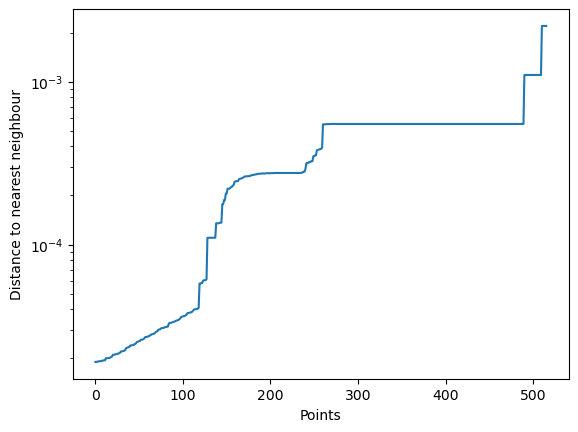

In [81]:
# Hier eigenen Code schreiben ...
unsorted_min_distances = [minDist(i,j) for i,j in zip(x_new, y_new)] # min_distances[0] := index of point closest to point p=(x[0],y[0])
sorted_min_distances = np.sort(unsorted_min_distances)
min_distances = sorted_min_distances

plt.xlabel('Points')
plt.ylabel('Distance to nearest neighbour')
plt.yscale("log") # convert y-axis to a logarithmic scale
plt.plot(range(len(sorted_min_distances)), sorted_min_distances) # the sorted min_dist list won't have the right point indicies
plt.show()


In [82]:
# Hier sind einige Plausibilitätstests:
assert len(min_distances) == n_innen
assert 110 < min_distances[-1]/min_distances[0] < 120
assert np.isclose(min_distances[333],min_distances[444])

## 2) Strömungsgeschwindigkeiten

Nun sollen die im Datensatz auftretenden Geschwindigkeiten näher betrachtet werden.

**2.1) Erstellen Sie für einen groben Überblick [Histogramme](https://de.wikipedia.org/wiki/Histogramm) der drei Geschwindgikeitskomponenten.**

  * Verwenden Sie hierfür die matplotlib-Funktion [_hist()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).
  * Zeichnen Sie die drei Graphen nebeneinander (3 Plots in einer Zeile).
  * Nutzen Sie für die Histogramme je 100 Bins ( = [Klassen](https://de.wikipedia.org/wiki/Histogramm#Einteilung_in_Klassen)) gleichen Umfangs.
  * Wie hoch ist die absolute Häufigkeit (Anzahl der Elemente) für die Bins mit den jeweils meisten Elementen (`n_u_max`, `n_v_max`, `n_w_max`)?
  * Wie groß ist die höchste Geschwindigkeit in $x$-Richtung `u_max`?

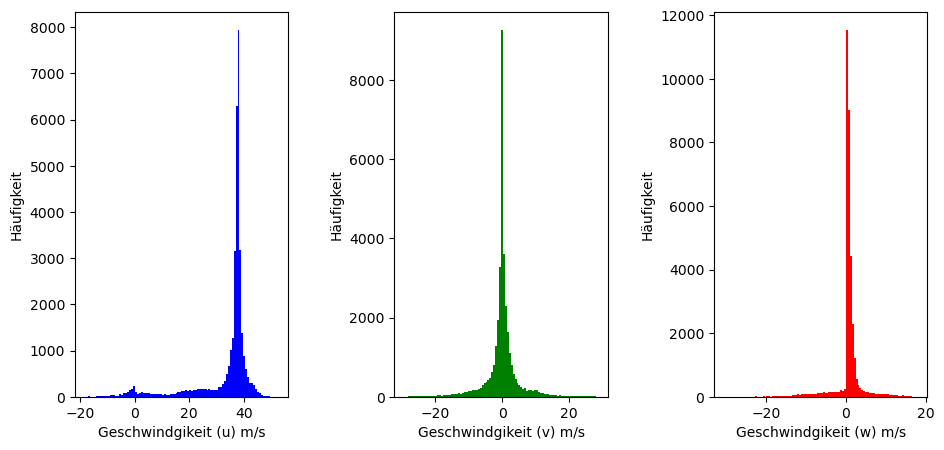

n_u_max: 7940
n_v_max: 9263
n_w_max: 11532
u_max: 52 m/s


In [84]:
# Hier eigenen Code schreiben ...

# the histogram (n := relative Häufigkeit, bins := Geschwindigkeit)
plt.figure(3, (11,5))

# subplots
plt.subplot(131)
n_u, bins_u, patches_u = plt.hist(u, bins=100, color='b')
plt.xlabel('Geschwindgikeit (u) m/s')
plt.ylabel('Häufigkeit')

plt.subplot(132)
n_v, bins_v, patches_v = plt.hist(v, bins=100, color='g')
plt.xlabel('Geschwindgikeit (v) m/s')
plt.ylabel('Häufigkeit')

plt.subplot(133)
n_w, bins_w, patches_w = plt.hist(w, bins=100, color='r')
plt.xlabel('Geschwindgikeit (w) m/s')
plt.ylabel('Häufigkeit')

# Abstände anpassen
plt.subplots_adjust(wspace=0.5)
plt.show()

# Absolute Häufigkeiten
n_u_max = max(n_u)
n_v_max = max(n_v)
n_w_max = max(n_w)

# Höchste Geschwindigkeit
u_max = max(max(bins_u), max(bins_v), max(bins_w)) 

print('n_u_max: %d\nn_v_max: %d\nn_w_max: %d\nu_max: %d m/s' %(n_u_max,n_v_max,n_w_max,u_max))

In [85]:
# Hier sind einige Plausibilitätstests:
assert 50<u_max<55
assert 7e3<n_u_max<n_v_max<n_w_max<12e3

**2.2) Visualisieren Sie die Strömung in unterschiedlichen Plotvarianten.**

  * Berechnen Sie die Geschwindigkeitsbeträge ([Länge der Geschwindigkeitsvektoren](https://de.wikipedia.org/wiki/Euklidische_Norm)) `u_mag` an den Gitterpunkten.
  * Erzeugen Sie 4 Visualisierungen der errechneten Werte:
      1. mithilfe der [_scatter()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)-Funktion und Farbskalierung der Werte.
      2. mithilfe der [_tricontourf()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tricontourf.html)-Funktion mit 8, 32 sowie 256 Farblevels (hier ist ausnahmsweise die Verwendung einer Schleife sinnvoll).
  * Zeichnen Sie immer den Zylinderkreis in weißer Farbe mit ein.
  * Fügen Sie jeweils einen [Colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) hinzu, damit die Farben Geschwindigkeitswerten zugeordnet werden können.

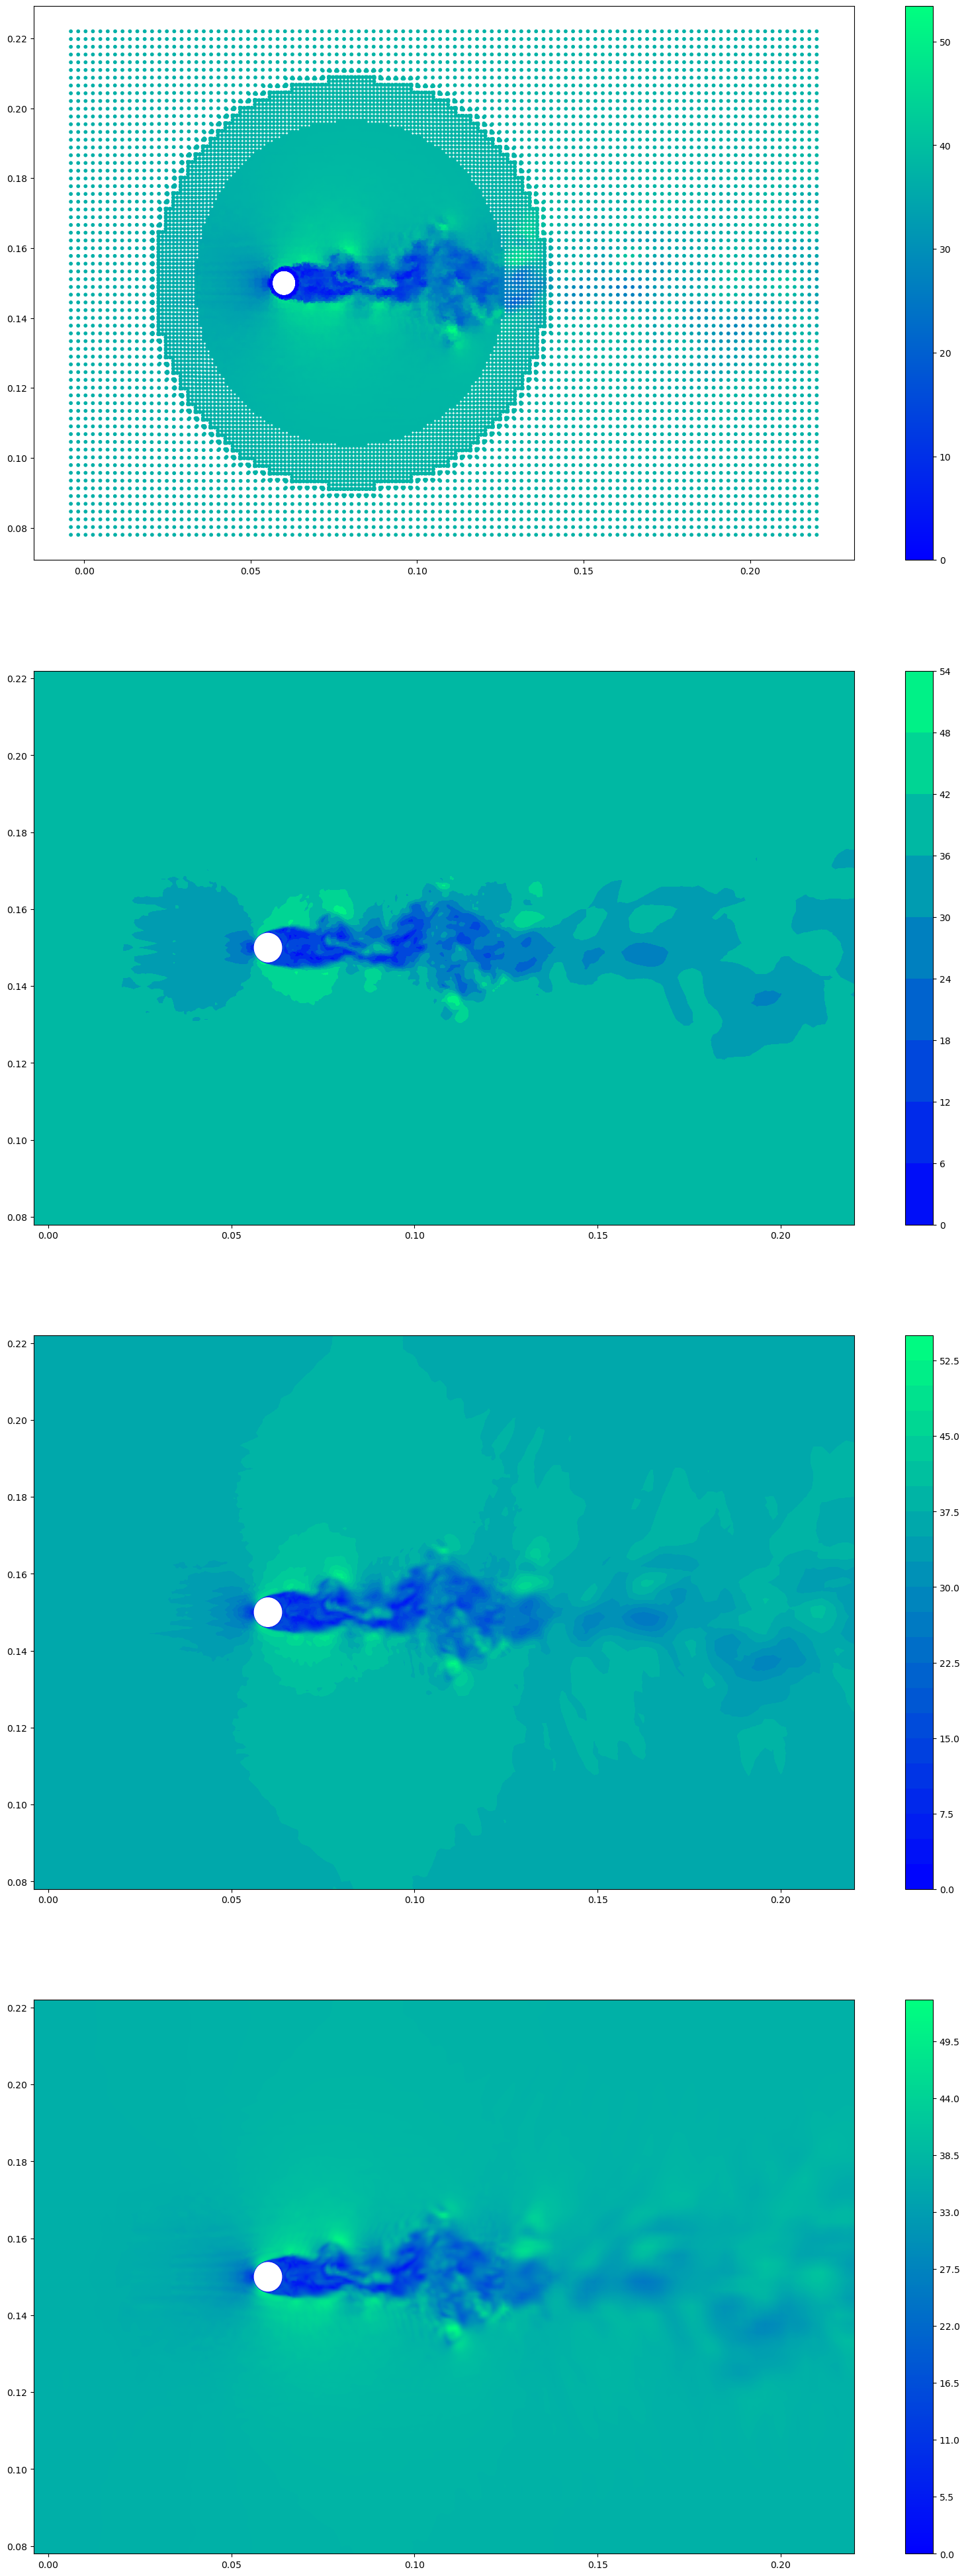

In [86]:
from matplotlib.tri import Triangulation

# values
u_mag = np.array([np.linalg.norm([v1,v2,v3]) for v1,v2,v3 in zip(u,v,w)])
plt.figure(5,(20,50))

#  1) scatter() Plot
plt.subplot(4,1,1)
plt.scatter(x, y, s=10, c=u_mag, cmap='winter') # c := colors
plt.colorbar()

# 2) tricontourf() Plot
farblevel = [8,23,256]
for i, fl in zip(range(2,5),farblevel):
    plt.subplot(4,1,i)
    plt.xticks(np.linspace(0.0,0.20,5))
    
    triang = Triangulation(x, y) # Triangulationsgitter aus Gitter punkten x,y erstellen, triangles werden hier automatisch generiert
    plt.tricontourf(triang, u_mag, levels=fl, cmap='winter') 
    # levels := farblevel -> die Anzahl und Positionen der Konturlinien / -bereiche.
    # u_mag := Die Höhenwerte, über die die Kontur gezeichnet wird. Die Farbmapping wird durch cmap gesteuert.
    
    ax = plt.gca()
    ax.add_patch(Circle((x_center, y_center), radius, color='w')) # same dimensions as circle from 1)
    plt.colorbar()
    
plt.show()

In [87]:
# Hier sind einige Plausibilitätstests:
assert u_mag.shape == u.shape
assert int(u_mag.mean()) == 35

## 3) Wirbelstärke

Um "interessante" Regionen in einem Strömungsfeld zu identifizieren, wird häufig die [Wirbelstärke](https://de.wikipedia.org/wiki/Wirbelst%C3%A4rke) verwendet, die nun berechnet werden soll. 
Hier genügt die Berechnung in 2D, d.h. die Wirbelstärke in $z$-Richtung. Diese ist wie folgt definiert:

$$
    \omega_z = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}\tag{1}
$$

Offenbar werden die partiellen Ableitungen der Geschwindigkeiten benötigt. 
Diese waren in der Datendatei jedoch nicht enthalten und müssen demzufolge aus verfügbaren Daten berechnet werden. 
Da nur diskrete Werte vorliegen, muss die Ableitung über den [Differenzenquotienten](https://de.wikipedia.org/wiki/Differenzenquotient) erfolgen. 
Dies wäre viel einfacher, wenn die Daten auf einem regelmäßigen rechteckigen Gitter vorliegen würden.

Praktischerweise enthält das SciPy-Modul mit [_griddata()_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html) eine Funktion, die unregelmäßige Daten auf ein reguläres Gitter abbilden kann.
Um ein Gitter mit regelmäßigen Abständen zu erzeugen, kann zum Beispiel die Funktion [_meshgrid()_](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) zusammen mit [_arange()_](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) (beide aus dem NumPy-Modul) verwendet werden.

**3.1) Erzeugen Sie ein Gitter mit regelmäßigen Abständen und interpolieren Sie die unregelmäßig verteilten Geschwindigkeitsdaten auf dieses Gitter.**

  * Verwenden Sie die Funktion [_meshgrid()_](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) und speichern Sie die Gitterkoordinaten in den Variablen `gx` bzw. `gy`.
  * Das neue Gitter sollte eine Schrittweite von $10^{-4}\,$m haben (sowohl in $x$- als auch in $y$-Richtung) und den Simulationsbereich beinhalten.
  * Interpolieren Sie $u$, $v$ und $w$ jeweils separat, sodass Sie drei neue (große) Arrays erhalten.
  * Zur Überprüfung, ob alles korrekt funktioniert hat, visualisieren Sie den Betrag der neuen Vektoren mithilfe von [_imshow()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).
      * Setzen Sie den Parameter `vmax` auf einen sinnvollen Wert.
      * Tragen Sie im Parameter `extent` den tatsächlichen Umfang des Gitters ein.
      * Zeichnen Sie auch hier den weißen Kreis an die passende Position.
  

_Hinweis: Wenn Sie sich der Leistungsfähigkeit Ihres Computers nicht sicher sind, beginnen Sie mit einer gröberen Schrittweite._

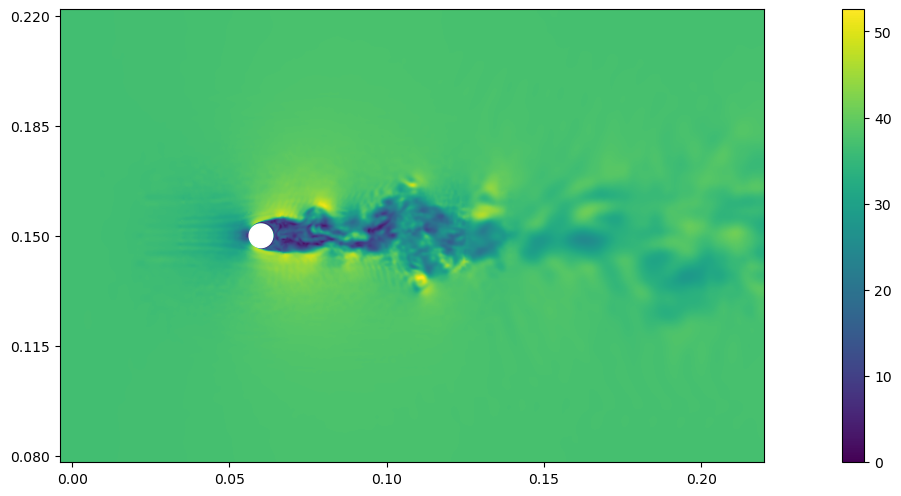

In [90]:
from scipy.interpolate import griddata # Vorschlag für Interpolationsmethode für sanfte Übergänge: "cubic"
from matplotlib import colormaps
# Hier eigenen Code schreiben ...

#### build meshgrid
step = 0.0001 # ziel schrittweite: 0.0001
xVals = np.arange(xmin, xmax, step) 
yVals = np.arange(ymin, ymax, step)
gx, gy = np.meshgrid(xVals, yVals)

plt.figure(6,(20,20))

#### Interpolate the speed values at the points of the grid
#### grids
plt.subplot(3,1,1)
grid_u = griddata((x,y), u, (gx, gy), method='cubic')
grid_v = griddata((x,y), v, (gx, gy), method='cubic')
grid_w = griddata((x,y), w, (gx, gy), method='cubic')

# -> circle
ax = plt.gca()
ax.add_patch(Circle((x_center, y_center), radius, color='w'))

#### Betrag des neuen Vektors 
u_mag_new = np.sqrt(grid_u**2 + grid_v**2 + grid_w**2)

#### plot
plt.xticks(np.linspace(0,0.2,5))
plt.yticks(np.linspace(0.08,0.22,5))
plt.imshow(u_mag_new, vmax = u_max, extent=[xmin,xmax,ymin,ymax], origin='lower')
plt.colorbar()
plt.show()

In [91]:
# Hier sind einige Plausibilitätstests:
assert gx.shape == gy.shape
assert len(gx.shape) == 2
assert gx.shape[1]-gx.shape[0] == 800

Mit den nun auf einem regelmäßigen Gitter vorliegenden Daten können die partiellen Ableitungen einfach approximiert werden über

$$
    \frac{\partial v_{i,j}}{\partial x} \approx \frac{v_{i,j+1}-v_{i,j}}{\Delta x} \tag{2}
$$

und

$$
    \frac{\partial u_{i,j}}{\partial y} \approx \frac{u_{i,j}-u_{i+1,j}}{\Delta y}~.\tag{3}
$$

Die Indizes zählen von $i=0\ldots N_\text{Zeilen}-1$ bzw. $j=0\ldots N_\text{Spalten}-1$. Man beachte, dass ein geringerer Zeilenindex für einen höheren $y$-Wert steht.

**3.2) Berechnen Sie die Ableitungen und die Wirbelstärken $\omega_z$ entsprechend Gleichung (1). Visualisieren Sie die Wirbelstärken `omega_z` mit _imshow()_.**
  
  * Wählen Sie eine divergierende [Colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) und stellen Sie sicher, dass der Wert 0 darin weiß dargestellt wird.
  * Zeichnen Sie auch hier den weißen Zylinderkreis ein.
  * Setzen Sie den dargestellten Wertebereich so, dass der Plot informativ ist.
  * Fügen Sie einen Colorbar hinzu.

_Hinweis: Versuchen Sie, effizienten Code zu schreiben! Diese Berechnung sollte nicht allzu lange dauern (vielleicht einige wenige Sekunden). Erhöhen Sie zu Testzwecken die Schrittweite, falls erforderlich._

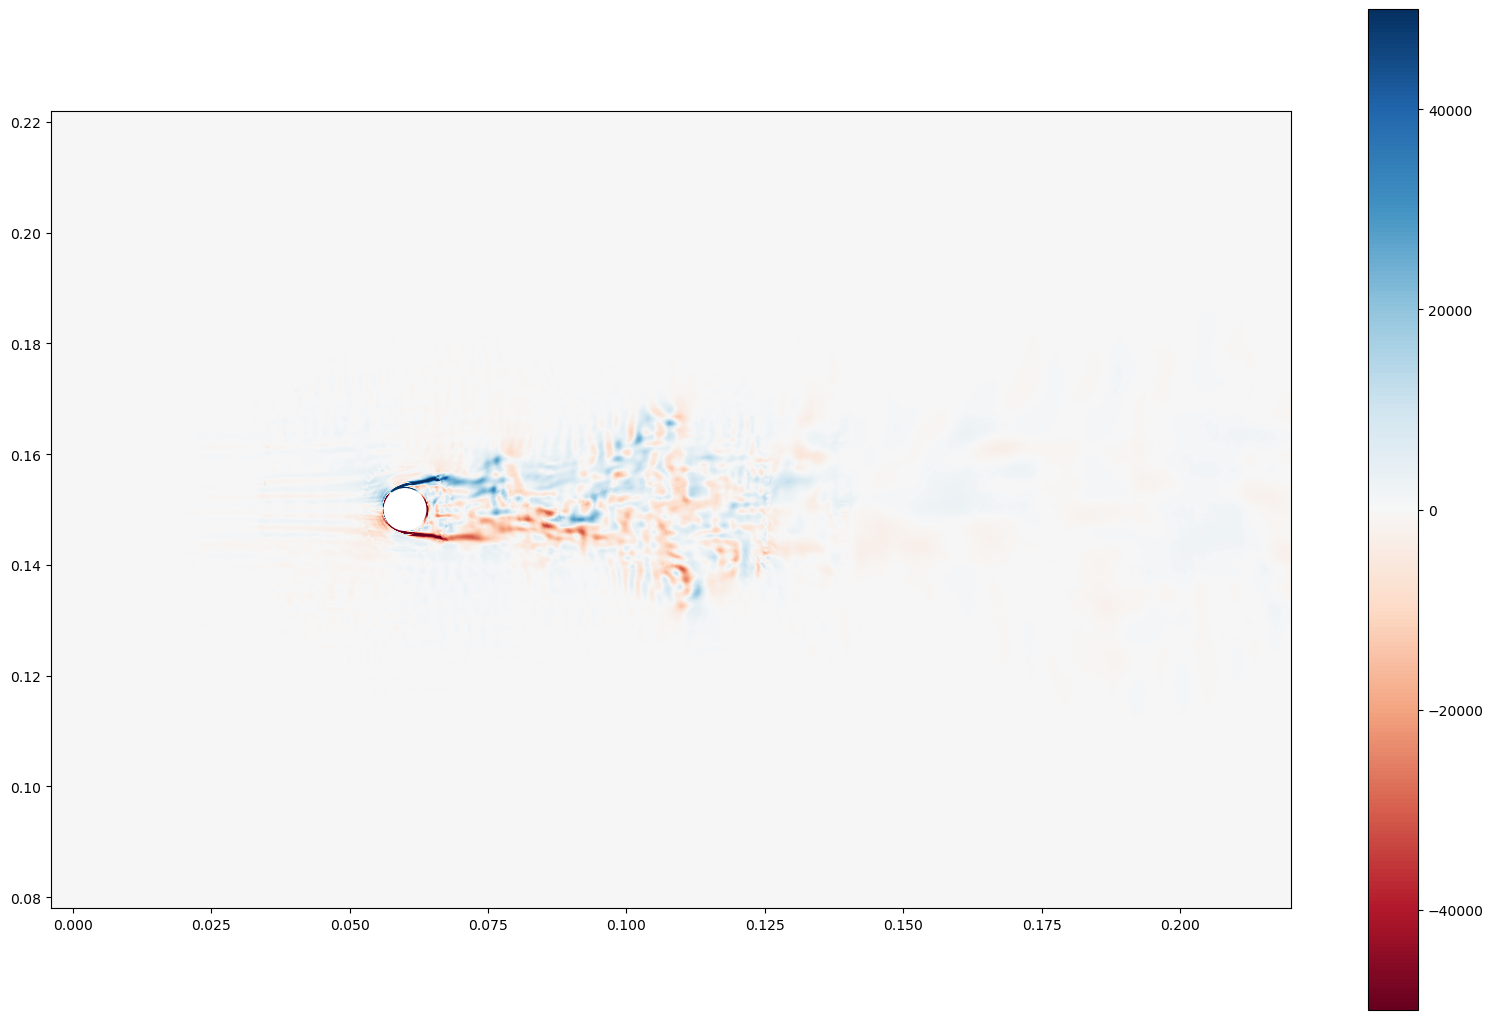

In [124]:
# Hier eigenen Code schreiben ...

#### Calculate the partial derivatives
#omega_z := dv/dx - du/dy
dx = dy = 1e-4

#### Aufgabe über indizes lösen:
#get dimensions
rowV, colV = grid_v.shape
rowU, colU = grid_u.shape

#with numpy
#dv_ij = grid_v - np.roll(grid_v, shift=-1, axis=1) # grid_v - grid_v (which was shifted by 1 along the x-axis)
#du_ij = grid_u - np.roll(grid_u, shift=-1, axis=0) # grid_u - grid_u (which was shifted by 1 along the y-axis)

#with slicing
dv_ij = grid_v[:,1:]-grid_v[:,:-1]
du_ij = grid_u[:-1,:]-grid_u[1:,:]

dv_ij = dv_ij[:-1,:] # remove last row
du_ij = du_ij[:,1:] # remove last column

# Teilen
dv = dv_ij/dx
du = du_ij/dy

##### Wirbelstärke in z-Richtung
omega_z = dv-du

#### plot
plt.figure(figsize = (20,13))
plt.imshow(omega_z, cmap=colormaps['RdBu'], vmin = -5*10**4, vmax = 5*10**4, extent=[xmin,xmax,ymin,ymax], origin='lower')
ax = plt.gca()
ax.add_patch(Circle((x_center, y_center), radius, color='w'))
plt.colorbar()
plt.show()

In [125]:
# Hier sind einige Plausibilitätstests:
assert np.abs(np.nanmean(omega_z))<10
assert 8e5<np.nanmax(omega_z)-np.nanmin(omega_z)<10e5

AssertionError: 